# Machine Learning: Basic Principles 2018

# Feature Learning

### Learning goals

In this exercise you will learn how to use __principal component analysis (PCA)__ for __feature learning__. PCA allows us to optimally compress the information contained in high-dimensional raw feature vectors into a small set of new features, which are called __principal components__ (PC). These new features are then used to formulating and solving an overall ML problem  (regression or classification). Using the PCs as features (instead of the raw feature vectors) is beneficial in terms of computational complexity (smaller feature vectors typically means less computation) and statistical properties of the learning method (smaller feature vectors prevent overfitting). Moreover, using the first two PCs allows to visulaize high-dimensional data points conveniently using a scatter plot.

<!--A second benefit of PCA (or feature learning in general), besides reducing computational complexity, is to avoid overfitting. 
Your task in this exercise is to fill in `...` under `### STUDENT TASK ###`. -->

### Exercise Contents

1. The Data 
2. [Principal Component Analysis (PCA)](#Q1) <br>
 2.1 [Getting Hands on the Data](#Q2) <br>
 2.2 [Using PCA for data visualization](#2d_vis) <br>
 2.3 [Combining PCA with linear regression](#PCA_before_reg)<br>

### Keywords
`principal component analysis (PCA)`, `eigenvalue decomposition`, `data visualization`, `overfitting`.

## 1. The Data

We have collected a bunch of images depicting a fruit. These images are stored in the folder "fruits" using the filenames "1_b.jpg", "2_b.jpg", ...,"20_b.jpg". The following code block loads the images and stored them in the array "dataset".

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

samplesize = 20
dataset = np.zeros((samplesize-1,50,50),dtype=np.uint8)

for i in range(1,samplesize):
    img = Image.open('./fruits/%s_b.jpg'%(str(i))).convert('L')
    dataset[i-1] = np.array(img,dtype=np.uint8)

    

Plot six images out of the dataset.

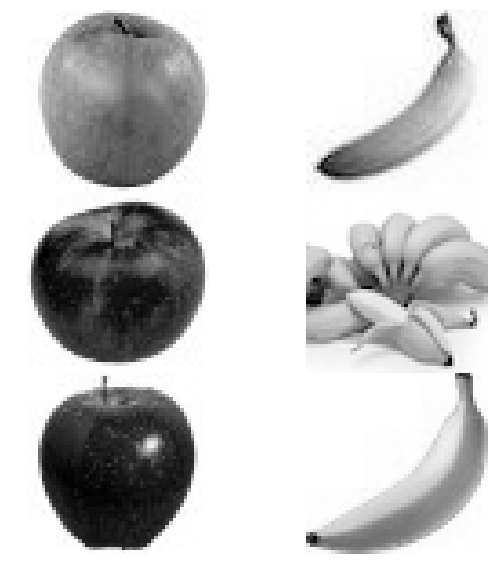

In [2]:
fig,ax = plt.subplots(3,2,figsize=(10,10),gridspec_kw = {'wspace':0, 'hspace':0})

for i in range(3):
    for j in range(2):
        ax[i,j].imshow(dataset[12+i+j*3], cmap='gray')
        ax[i,j].axis('off')

In [3]:
# Reshaping the images as vectors and store them in the rows of "datamatrix"
datamatrix = np.reshape(dataset,(samplesize-1,-1))

## 2. Principal Component Analysis (PCA)
<a id="Q1"></a>
Let us represent each fruit image by a raw feature vector $\mathbf{z}^{(i)} \in \mathbb{R}^{D}$. 
The aim of PCA is to find the (in a certain sense) optimal compression matrix $\mathbf{W} \in \mathbb{R}^{d \times D}$, with $d \ll D$, that transforms the raw feature (data) vector $\mathbf{z}^{(i)}$ to a short feature vector 

\begin{equation}
    \mathbf{x}^{(i)}=\mathbf{W} \mathbf{z}^{(i)}. 
    \tag{1} 
    \label{eq:1}
\end{equation}

We quantify the loss of information when replacing the original data vectors $\mathbf{z}^{(i)}$ with the new feature vectors $\mathbf{x}^{(i)}$ by the smallest possible reconstruction error 

\begin{align}
 \mathcal{E}(\mathbf{W}) & = \min_{\mathbf{R} \in \mathbb{R}^{D \times d}} (1/N) \sum_{i=1}^{N} \| \mathbf{z}^{(i)} - \mathbf{R} \mathbf{x}^{(i)} \|^{2}  \nonumber \\ 
 & \stackrel{\eqref{eq:1}}{=} \min_{\mathbf{R} \in \mathbb{R}^{D \times d}} (1/N) \sum_{i=1}^{N} \| \mathbf{z}^{(i)} - \mathbf{R} \mathbf{W} \mathbf{z}^{(i)} \|^{2}.
 \label{eq:2}
 \tag{2}
\end{align} 

Note that the optimal reconstruction matrix $\mathbf{R}$ depends on the given compression matrix $\mathbf{W}$. However, we are not interested in the optimal reconstruction matrix itself but only the associated minimum reconstruction error $\mathcal{E}(\mathbf{W})$. In order to construct the optimal compression matrix $\mathbf{W}$ which minimizies the reconstruction $\mathcal{E}(\mathbf{W})$ we will use the eigenvalue decomposition of the sample covariance matrix 

\begin{equation}
\mathbf{Q} = (1/N) \mathbf{Z}^{T} \mathbf{Z} \mbox{ with data matrix } \mathbf{Z}=\big(\mathbf{z}^{(1)},\ldots,\mathbf{z}^{(N)} \big)^{T} \in \mathbb{R}^{N \times D}. 
\label{eq:3}
\tag{3}
\end{equation}

Since the matrix $\mathbf{Q}$ is **positive semi-definite**, it has an eigenvalue decomposition of the from 

\begin{equation}
\mathbf{Q} = \big( \mathbf{u}^{(1)},\ldots,\mathbf{u}^{(D)}\big) {\rm diag} \{\lambda^{(1)},\ldots,\lambda^{(D)} \} 
 \big( \mathbf{u}^{(1)},\ldots,\mathbf{u}^{(D)}\big)^{T}.
\end{equation} 

Here, the orthonormal vectors $\mathbf{u}^{(r)}$ are eigenvectors of $\mathbf{Q}$ which correspond to the (decreasinly ordered) eigenvalus $\lambda^{(1)} \geq \lambda^{(2)} \geq \ldots \geq \lambda^{(D)}$ of $\mathbf{Q}$. 

The reconstruction error $\mathcal{E}(\mathbf{W})$ (see \eqref{eq:2}) is minimized for the particular compression matrix 

\begin{equation}
\label{eq:4}
\tag{4}
\mathbf{W}_{\rm PCA} = \big( \mathbf{u}^{(1)},\ldots,\mathbf{u}^{(d)} \big)^{T},
\end{equation}

whose rows are the eigenvectors $\mathbf{u}^{(1)},\ldots,\mathbf{u}^{(d)}$ of $\mathbf{Q}$ corresponding to the 
$d$ largest eigenvalues $\lambda^{(1)},\ldots,\lambda^{(d)}$ of $\mathbf{Q}$. 

Moreover, it can be shown that the minimum reconstruction error $\mathcal{E}(\mathbf{W}_{\rm PCA})$ is achieved 
for the reconstruction matrix $\mathbf{R} = \mathbf{W}_{\rm PCA}^{T}$ and given by 

\begin{equation}
\label{eq:5}
\tag{5}
\mathcal{E}(\mathbf{W}_{\rm PCA}) = \sum_{r = d+1}^{D} \lambda^{(r)}. 
\end{equation} 



<!--PCA amounts to determining a compression matrix $\mathbf{W}_{PCA}$ such that the new features $\mathbf{x}_{PCA}^{(i)}=\mathbf{W}_{PCA}\mathbf{z}^{(i)}$, which are called prinicpal components, allow to linearly reconstruct the original data points $\mathbf{z} \in \mathbb{R}^D$ with minimal error (see Chapter 9.1 of the course book for more details). For a given data set $\{\mathbf{z}^{(i)}\}_{i=1}^{N}$ the PCA matrix $\mathbf{W}_{PCA} \in \mathbb{R}^{d \times D}$ can be obtained via the eigenvalue decomposition of the matrix $\mathbf{Q}=(1/N) \mathbf{Z}^{T} \mathbf{Z}$, where $\mathbf{Z} = {(\mathbf{z}^{(1)},...,\mathbf{z}^{(N)})}^T \in \mathbb{R}^{N \times D}$ is the data matrix which contains the original data points $\mathbf{z}$ in its rows. In particular, $\mathbf{W}_{PCA}={(\mathbf{u}^1,...,\mathbf{u}^d)}^T$ consists of $d$ orthonormal eigenvectors $\mathbf{u}^l$ which correspond to the $d$ largest eigenvalues of the matrix $\mathbf{Q}$.
-->

For an intuitive explanation of PCA, this is an excellent StackExchange answer: https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues


#### Tasks
- You have to implement the PCA algorithm as a Python function "compute_pca_weight_matrix" which has two input arguments: the data matrix $\mathbf{Z}$ and the number $d$ of new features (principal components).
 
    - Compute the matrix $\mathbf{Q}=(1/N) \mathbf{Z}^{T} \mathbf{Z}$ (see (3))
    - Compute eigenvectors $(\mathbf{u}^{(1)},...,\mathbf{u}^{(D)})$ and corresponding eigenvalues $(\lambda^1,...,\lambda^D)$ of $\mathbf{Q}$. (see introduction notebook for a review of eigendecomposition in Python). 
    - Sort the eigenvalues in a decreasing order: $\lambda^{(1)} \geq \lambda^{(2)} \geq...\lambda^{(D)} \geq 0$.
    - Choose $d$ eigenvectors corresponding to $d$  largest eigenvalues to form the compression matrix $W_{PCA}=(\mathbf{u}^{(1)},...,\mathbf{u}^{(d)})^{T} \in \mathbb{R}^{d \times D}$ 
    - return the compresssion matrix $\mathbf{W}_{\rm PCA}$ (see (4)) and corresponding reconstruction error (5)
    
Note: make sure that the Python routing you are using for computing the eigenvalue decomposition returns the eigenvectors and eigenvalues in the correct order! Otherwise you might have to re-arrange them accordingly. 

In [4]:
### STUDENT-TASK ###



def compute_pca_weight_matrix(Z, d):
    #Input: the N by D data matrix Z(step 1), the number of components d
    #Output: a d by D matrix W_pca, and the corresponding reconstuction error E(W_{pca})
    
    # compute the sample cov. matrix Q
    Q = np.matmul(np.transpose(Z), Z)
    Q = np.divide(Q, Z.shape[0])

    #step3: compute the eigenvalues and eigenvectors (see introduction notebook)
    eigvalues, eigvectors = np.linalg.eig(Q)
    eigvalues = abs(eigvalues)
    #step4: Sort the eigenvectors by decreasing eigenvalues and form W_pca
    idx = eigvalues.argsort()[::-1]
    eigvalues = eigvalues[idx]    
    eigvectors = eigvectors[:,idx] 
    print(eigvalues[:5])
    error=sum(eigvalues[d:])
    W_pca = eigvectors[:,:d]
    W_pca = np.transpose(W_pca)
    
    return W_pca.real,eigvalues.real

## 2. Using PCA to reduce the dimensions of an apple images.

In this task we are going to apply PCA to reduce create lower dimensional representation of  We are going to use the PCA function you have implemented above to reduce the dimensions of images of apples.

In [5]:



#Computing the first 50 eigen vectors.
PCA,error = compute_pca_weight_matrix(datamatrix/255.,50)

[1325.79877675   43.16345759   12.74300554    7.9032767     5.02208411]


In [6]:
print(error)
print(PCA.shape)

[1.32579878e+03 4.31634576e+01 1.27430055e+01 ... 1.29289152e-16
 5.99673544e-17 2.61553709e-31]
(50, 2500)


Let us plot a few of the rows $\mathbf{u}^{(r)}$ of the optimal compression matrix $\mathbf{W}_{\rm PCA}$. These rows, which are eigenvectors of the sample covariance matrix $\mathbf{Q}$, are sometimes called "principal directions".

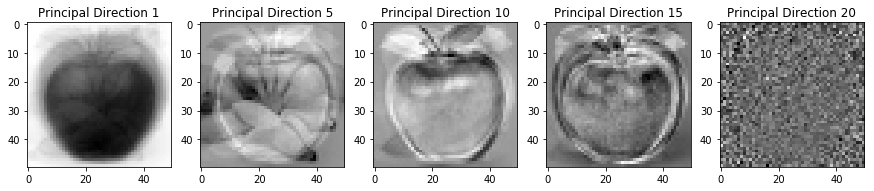

In [7]:
fig,ax = plt.subplots(1,5,figsize=(15,15))

plot_pd = [0,4,9,14,19]

for i in range(5):
    ax[i].imshow(np.reshape(PCA[plot_pd[i]]*255,(50,50)),cmap='gray')
    ax[i].set_title("Principal Direction %d"%(plot_pd[i]+1))
plt.show()
        

In [8]:
def plot_tranformed_with_comp(X,d):
    X_pca = np.matmul(PCA[:d,:],X[:,:,None])
    X_reversed = np.matmul(np.transpose(PCA[:d,:]),X_pca)[:,:,0]
    
    
    fig,ax = plt.subplots(3,2,figsize=(10,10))
    fig.suptitle("Reconstructed image using %d principal components."%(d))
    
    for i in range(3):
        for j in range(2):
            ax[i,j].imshow(np.reshape(X_reversed[10+i+j*3],(50,50)),cmap='gray')#imshow(all_apples[i+j*3])
            ax[i,j].axis('off')
    plt.show()

### Showing a couple of reconstrutions using different number of PC.

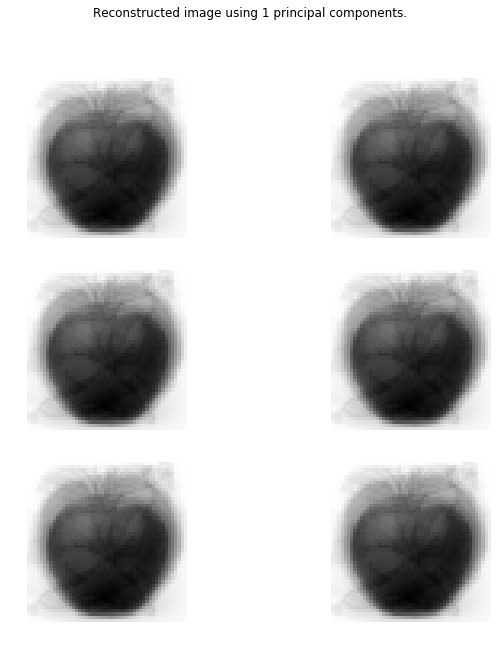

In [9]:
plot_tranformed_with_comp(datamatrix,1)

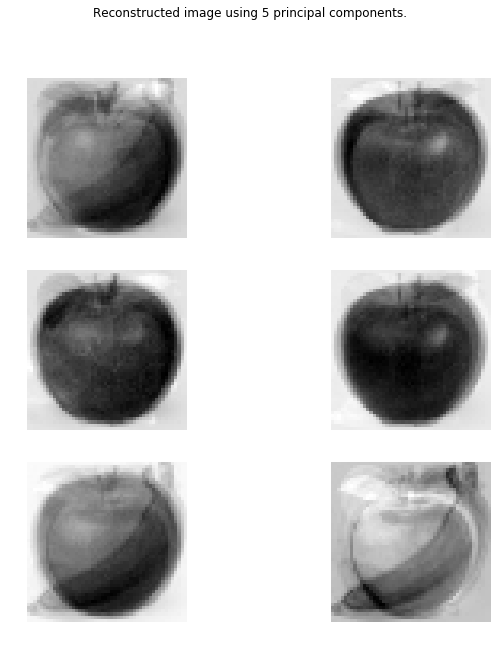

In [10]:
plot_tranformed_with_comp(datamatrix,5)

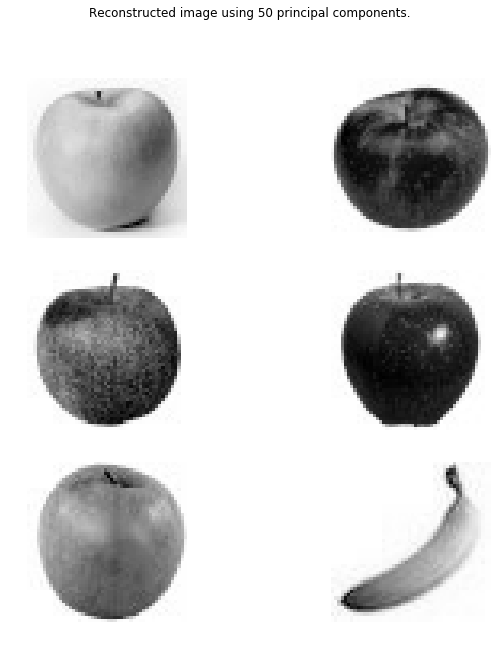

In [11]:
plot_tranformed_with_comp(datamatrix,50)